In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def plotimage(img, title, pos):
    ax = plt.subplot(3, 3, pos)
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')

(-0.5, 643.5, 499.5, -0.5)

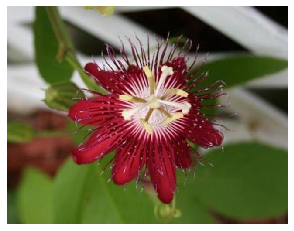

In [3]:
img = cv2.imread('D:/data/Flowers/image_00039.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')

In [4]:
kernel_avg_10_10 = np.ones((10, 10), np.float32) / 100
kernel_avg_5_5 = np.ones((5, 5), np.float32) / 25
print('Kernel 5x5 {}'.format(kernel_avg_5_5))

Kernel 5x5 [[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


In [5]:
smooth_img_f2D5_5 = cv2.filter2D(img, -1, kernel_avg_5_5)
smooth_img_f2D10_10 = cv2.filter2D(img, -1, kernel_avg_10_10)
smooth_img_blur = cv2.blur(img, (10, 10))
smooth_img_bfi = cv2.boxFilter(img, -1, (10, 10), normalize=True)
smooth_img_gb = cv2.GaussianBlur(img, (9, 9), 0)
smooth_img_mb = cv2.medianBlur(img, 9)
smooth_img_bf = cv2.bilateralFilter(img, 5, 10, 10)
smooth_img_bf_2 = cv2.bilateralFilter(img, 9, 200, 200)

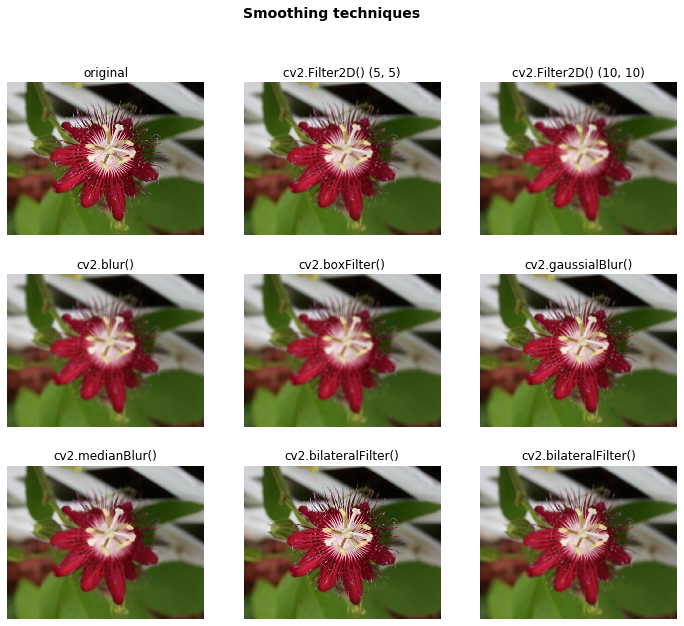

In [6]:
plt.figure(figsize=(12,10))
plt.suptitle('Smoothing techniques', fontsize=14, fontweight='bold')

plotimage(img, 'original', 1)
plotimage(smooth_img_f2D5_5, 'cv2.Filter2D() (5, 5)', 2)
plotimage(smooth_img_f2D10_10, 'cv2.Filter2D() (10, 10)', 3)
plotimage(smooth_img_blur, 'cv2.blur()', 4)
plotimage(smooth_img_bfi, 'cv2.boxFilter()', 5)
plotimage(smooth_img_gb, 'cv2.gaussialBlur()', 6)
plotimage(smooth_img_mb, 'cv2.medianBlur()', 7)
plotimage(smooth_img_bf, 'cv2.bilateralFilter()', 8)
plotimage(smooth_img_bf_2, 'cv2.bilateralFilter()', 9)

## Sharpen and Edge Detecting Kernel

In [7]:
def plotrc(img, title, row, col, pos):
    ax = plt.subplot(row, col, pos)
    plt.imshow(img)
    plt.title(title)
    plt.axis('off') 

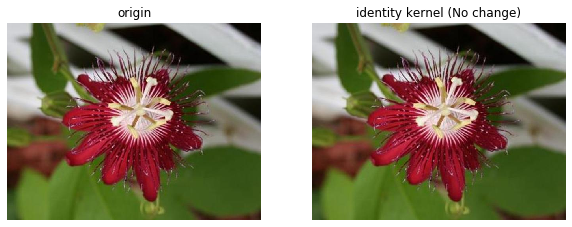

In [8]:
kernel_identity = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])

plt.figure(figsize=(10, 10))
plotrc(img, 'origin', 1, 2, 1)
plotrc(cv2.filter2D(img, -1, kernel_identity), 'identity kernel (No change)', 1, 2, 2)

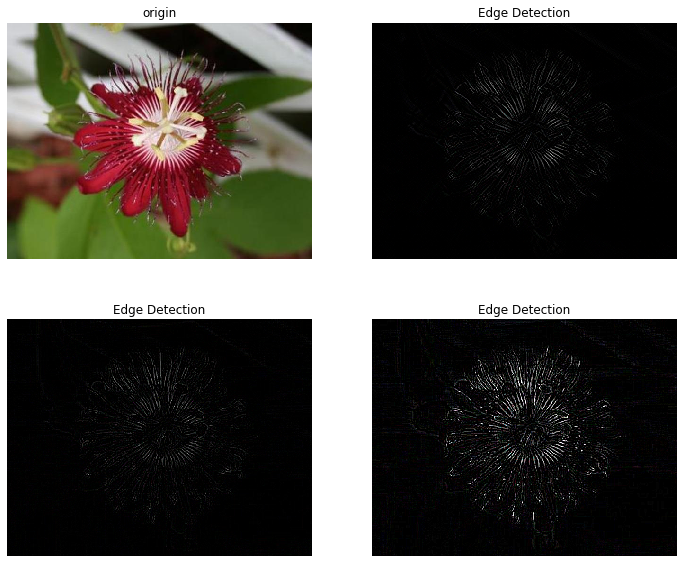

In [9]:
kernel_edge_detection_1 = np.array([[1, 0, -1], [0, 0, 0], [-1, 0, 1]])
kernel_edge_detection_2 = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
kernel_edge_detection_3 = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

plt.figure(figsize=(12, 10))
plotrc(img, 'origin', 2, 2, 1)
plotrc(cv2.filter2D(img, -1, kernel_edge_detection_1), 'Edge Detection', 2, 2, 2)
plotrc(cv2.filter2D(img, -1, kernel_edge_detection_2), 'Edge Detection', 2, 2, 3)
plotrc(cv2.filter2D(img, -1, kernel_edge_detection_3), 'Edge Detection', 2, 2, 4)

### Well-known kernel for edge detection

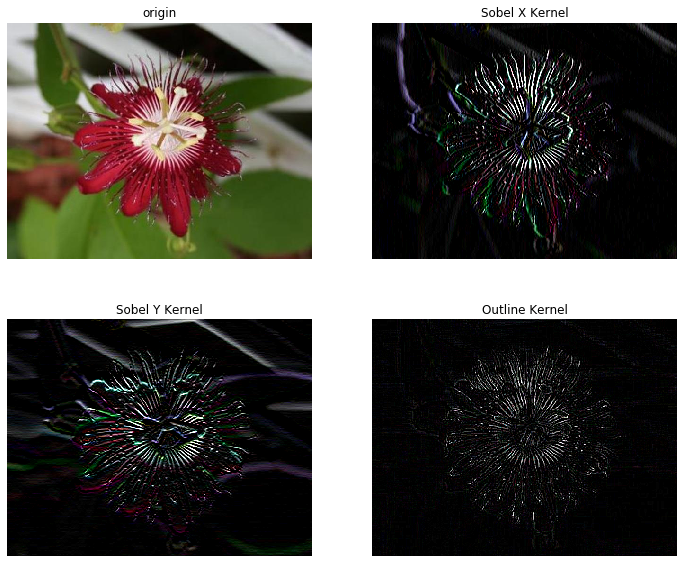

In [10]:
# Try different kernels for edge detection:
sobel_x_kernel = np.array([[1, 0, -1],
                           [2, 0, -2],
                           [1, 0, -1]])

sobel_y_kernel = np.array([[1, 2, 1],
                           [0, 0, 0],
                           [-1, -2, -1]])

outline_kernel = np.array([[-1, -1, -1],
                           [-1, 8, -1],
                           [-1, -1, -1]])

plt.figure(figsize=(12, 10))
plotrc(img, 'origin', 2, 2, 1)
plotrc(cv2.filter2D(img, -1, sobel_x_kernel), 'Sobel X Kernel', 2, 2, 2)
plotrc(cv2.filter2D(img, -1, sobel_y_kernel), 'Sobel Y Kernel', 2, 2, 3)
plotrc(cv2.filter2D(img, -1, outline_kernel), 'Outline Kernel', 2, 2, 4)

### Sharpen and Unsharpen kernel

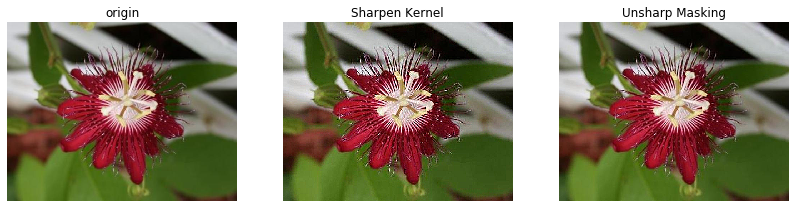

In [11]:
kernel_sharpen = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
kernel_unsharp_masking = -1 / 256 * np.array([[1, 4, 6, 4, 1],
                                              [4, 16, 24, 16, 4],
                                              [6, 24, -476, 24, 6],
                                              [4, 16, 24, 16, 4],
                                              [1, 4, 6, 4, 1]])

plt.figure(figsize=(14, 12))
plotrc(img, 'origin', 1, 3, 1)
plotrc(cv2.filter2D(img, -1, kernel_sharpen), 'Sharpen Kernel', 1, 3, 2)
plotrc(cv2.filter2D(img, -1, kernel_unsharp_masking), 'Unsharp Masking', 1, 3, 3)

### Sketch and Cartoonize Image

In [12]:
def sketch_image(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img_gray = cv2.medianBlur(img_gray, 5)
    edges = cv2.Laplacian(img_gray, cv2.CV_8U, ksize=5)
    ret, thresholded = cv2.threshold(edges, 150, 255, cv2.THRESH_BINARY_INV)
    return thresholded

def cartonize_image(img, gray_mode=False):
    """Cartoonizes the image applying cv2.bilateralFilter()"""

    # Get the sketch:
    thresholded = sketch_image(img)

    # Apply bilateral filter with "big numbers" to get the cartoonized effect:
    filtered = cv2.bilateralFilter(img, 10, 250, 250)

    # Perform 'bitwise and' with the thresholded img as mask in order to set these values to the output
    cartoonized = cv2.bitwise_and(filtered, filtered, mask=thresholded)
    if gray_mode:
        return cv2.cvtColor(cartoonized, cv2.COLOR_BGR2GRAY)
    return cartoonized

Text(0.5, 1.0, 'Sketch Image')

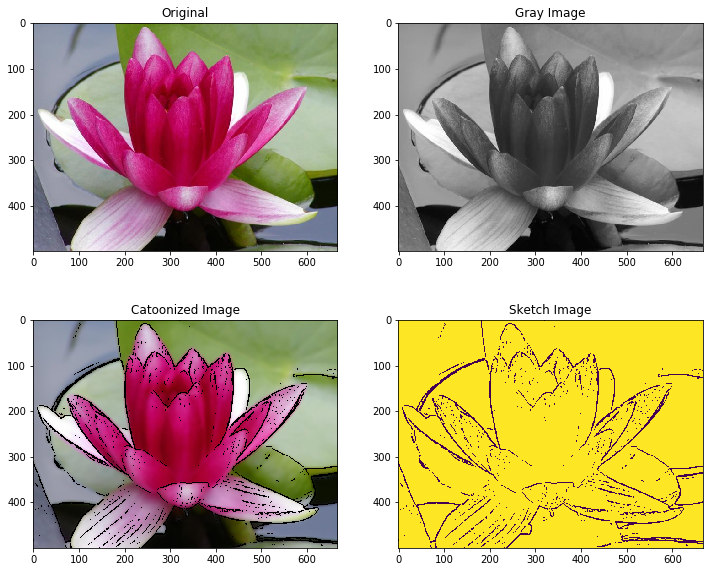

In [13]:
img = cv2.imread('D:/Data/Flowers/image_00293.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
plt.imshow(img)
plt.title('Original')

plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), cmap='gray')
plt.title('Gray Image')

plt.subplot(2,2,3)
plt.imshow(cartonize_image(img))
plt.title('Catoonized Image')

plt.subplot(2, 2, 4)
plt.imshow(sketch_image(img))
plt.title('Sketch Image')